In [33]:
import os
mingw_path = 'C:\\Program Files\\mingw-w64\\x86_64-5.3.0-posix-seh-rt_v4-rev0\\mingw64\\bin'
os.environ['PATH'] = mingw_path + ';' + os.environ['PATH']

import pandas as pd
import numpy as np
from scipy import stats, integrate
import matplotlib.pyplot as plt
# import seaborn as sns
from numpy import sort
#import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score
from xgboost import plot_importance
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
import random
from sklearn import metrics, preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.cluster import KMeans
from matplotlib.colors import ListedColormap
%matplotlib inline

In [34]:
data_path = "F:\\Users\\ivann_000\\AnacondaProjects\\MLBootcamp4\\data"
X = pd.read_csv(data_path+"\\x_train.csv", sep=';', header=None)
y = pd.read_csv(data_path+"\\y_train.csv", sep=';', header=None)[0]
X = pd.DataFrame(preprocessing.minmax_scale(X))

In [35]:
XX = X.copy()
corr_features = []
corr = XX.corr()
for i in corr:
    for j in corr:
        if ((abs(corr[i][j]) > 0.900) and (i!=j) and (i<j)):
            added = False
            for l, k in enumerate(corr_features):
                if not added:
                    if (i in k):
                        if j not in k:
                            k.append(j)
                        added = True
                    if (j in k):
                        if i not in k:
                            k.append(i)
                        added = True
            if not added:
                corr_features.append([i, j])
for i, c in enumerate(corr_features):
    for j, col in enumerate(c):
        if j == 0:
            XX['mean_'+str(i)]=XX[col]
        else:
            XX['mean_'+str(i)] += XX[col]
    XX['mean_'+str(i)] /= len(c)
    # Adds max & min
    for j, col in enumerate(c):
        XX['max_'+str(i)] = XX[c].max(axis=1)
        XX['min_'+str(i)] = XX[c].min(axis=1)
        
#     for j, col in enumerate(c):
#         XX[str(col)+'_from_mean'] = XX['mean_'+str(i)] - XX[col]
features_to_drop = np.array([])
for f in corr_features:
    features_to_drop = np.append(features_to_drop, f)
print(features_to_drop)
XX = XX.drop(features_to_drop, axis=1)
len(XX.columns)

[   0.    6.   26.   30.   51.   61.   70.  135.  138.  157.  183.  193.
  208.   23.   54.  120.  198.    1.    2.    7.   46.   69.   94.  117.
  118.  167.  199.  200.  216.  105.   81.  185.   13.   89.  141.  174.
  215.   19.  186.   32.  201.  219.   41.  184.  218.   58.   59.   66.
   76.   79.   87.  188.  213.  102.  103.  104.  107.  108.  128.  144.
  150.  168.  190.   12.   13.   87.  141.  174.   35.  102.  104.  107.
  144.  170.  190.  195.   58.  128.  155.   76.  125.   17.   18.   27.
   59.   72.   79.  108.  114.  168.  171.  179.  221.  184.   22.   98.
  112.   28.   29.   57.  104.   43.   32.   66.   90.   33.   77.   84.
  113.  127.  131.  139.  146.  148.  154.  165.  172.  177.   36.  163.
   92.  122.  162.  136.  147.  212.  209.   34.   44.   45.   64.   97.
  116.  169.  187.  204.  210.   78.  220.   85.   99.  176.   35.   76.
   58.   41.  150.   47.   49.  136.  147.   62.  180.   55.  130.  143.
  101.   63.  205.   71.  191.   78.   85.   99.  1

137

In [36]:
corr = XX.corr()
colors = ['red','green','blue','purple','yellow']
for i, k in enumerate(XX.columns):
    for j, l in enumerate(XX.columns):
        if (corr[k][l]> 0.9) & (i < j):
            print(k,l,corr[k][l])
#             fig = plt.figure(figsize=(15,15))
#             plt.title(str(k)+"_"+str(l))
#             plt.xlabel(str(k))
#             plt.ylabel(str(l))
#             plt.scatter(XX[k], XX[l], c=y, cmap=ListedColormap(colors))
#             fig.show()

mean_0 max_0 0.978051986875
mean_0 min_0 0.981191009228
max_0 min_0 0.944965486467
min_1 mean_2 0.927494922345
min_1 min_2 0.943546492829
min_1 min_9 0.917006209995
mean_2 min_2 0.988970529378
mean_2 min_5 0.962489229397
mean_2 mean_9 0.975978893846
mean_2 max_9 0.939385895389
mean_2 min_9 0.988811831746
min_2 min_5 0.956612661525
min_2 mean_9 0.972677576214
min_2 max_9 0.933041385953
min_2 min_9 0.989286451016
mean_3 max_3 0.990984227717
mean_3 min_3 0.979115167212
max_3 min_3 0.962172400827
mean_4 max_4 0.990001899438
mean_4 min_4 0.978823377352
max_4 min_4 0.947699183811
mean_5 max_5 0.956264188413
mean_5 min_5 0.932295061671
min_5 mean_9 0.948983794283
min_5 max_9 0.911674760966
min_5 min_9 0.960557184156
mean_6 max_6 0.985684055529
mean_6 min_6 0.971372589755
max_6 min_6 0.922178723751
mean_7 min_7 0.968244524642
mean_8 max_8 0.97100036009
mean_8 max_15 0.910534086354
min_8 mean_15 0.924284450656
min_8 min_15 0.931508076711
mean_9 max_9 0.983290554731
mean_9 min_9 0.988187005085
m

E:\Programs\Anaconda\lib\site-packages\matplotlib\figure.py:402: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "
E:\Programs\Anaconda\lib\site-packages\matplotlib\pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


KeyboardInterrupt: 

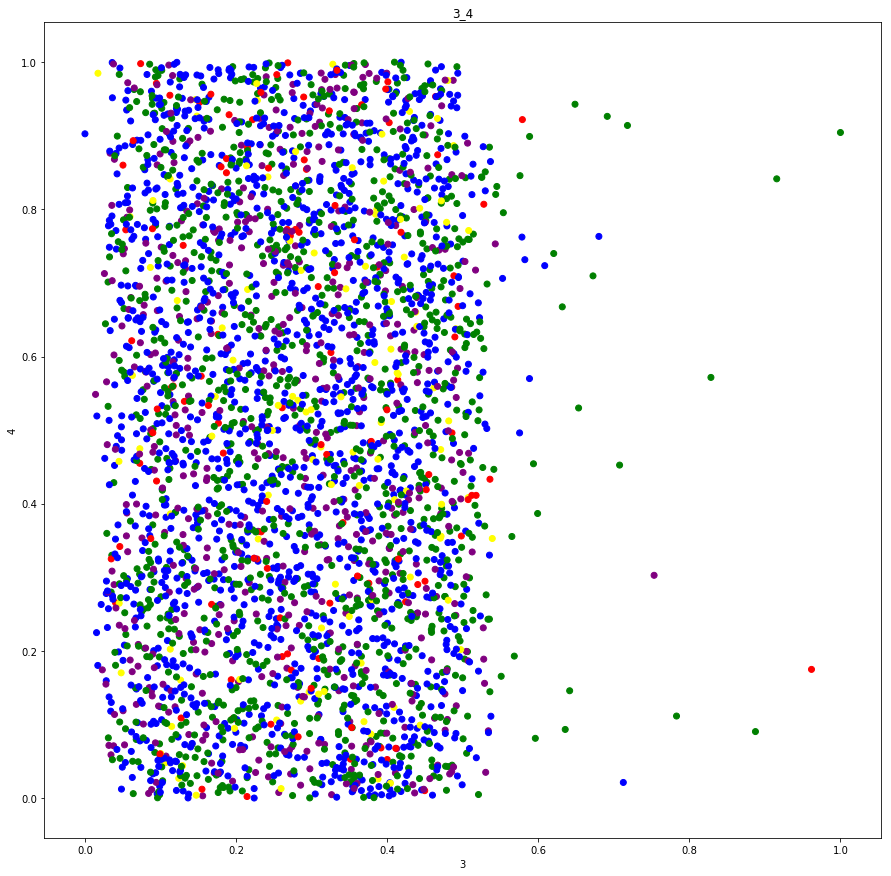

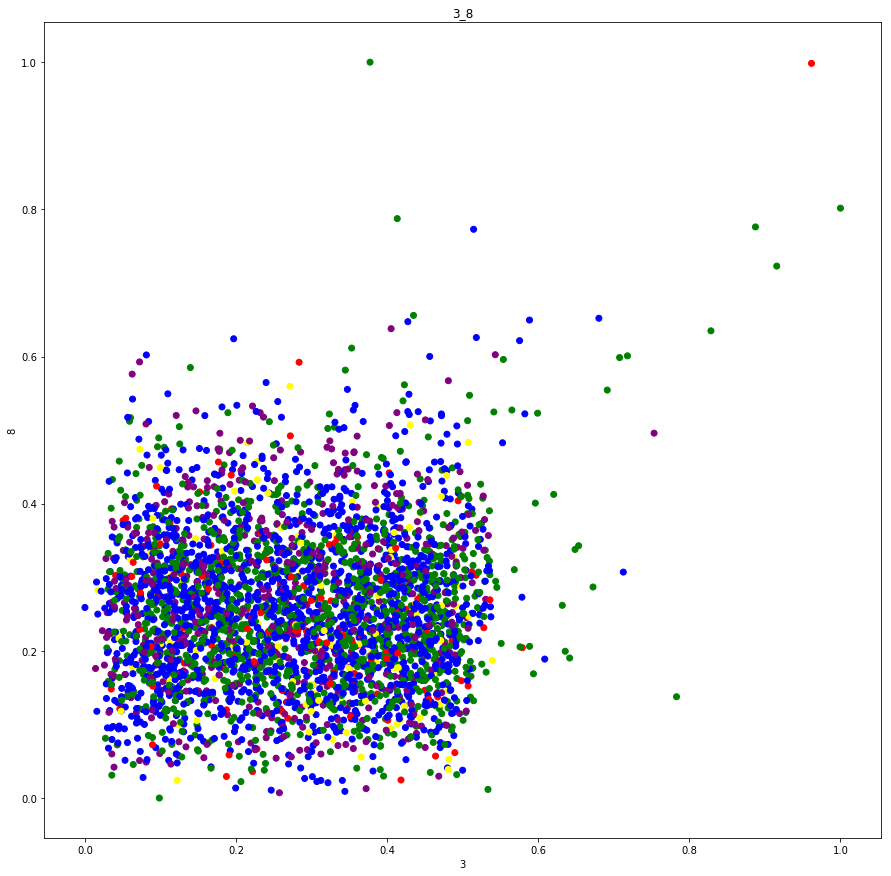

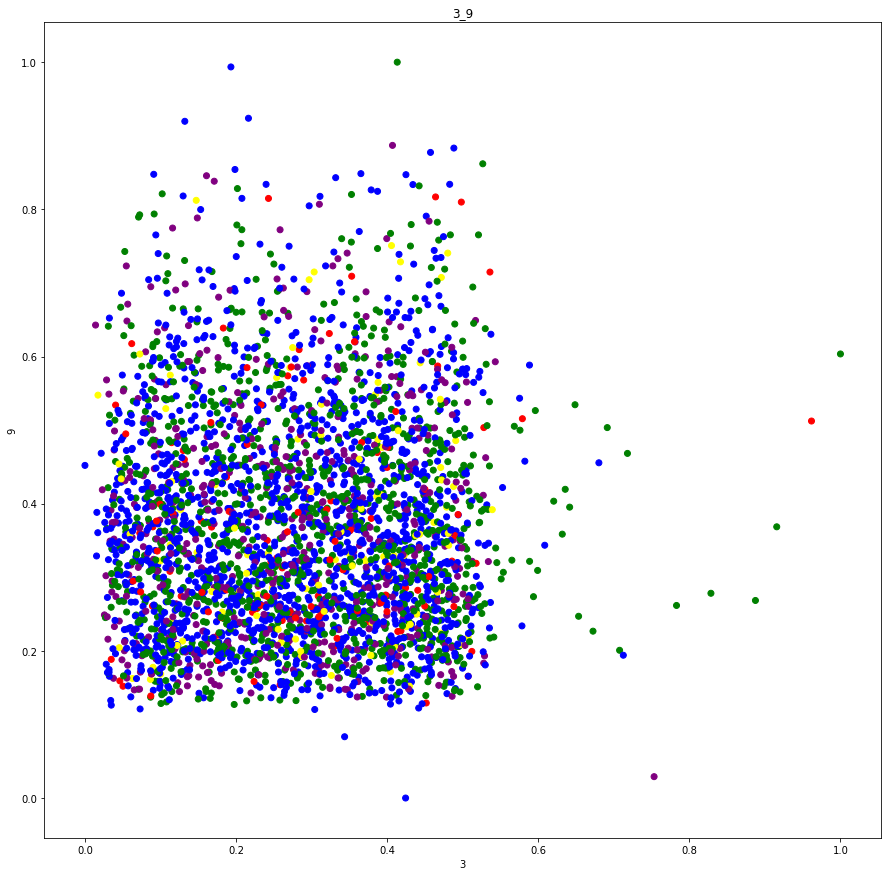

In [ ]:
colors = ['red','green','blue','purple','yellow']
for i, col_x in enumerate(XX.columns):
    for j, col_y in enumerate(XX.columns):
        if i < j:
            fig = plt.figure(figsize=(15,15))
            plt.title(str(col_x)+"_"+str(col_y))
            plt.xlabel(str(col_x))
            plt.ylabel(str(col_y))
            plt.scatter(XX[col_x], XX[col_y], c=y, cmap=ListedColormap(colors))
            fig.show()

Feature ranking:
1. feature 6 (0.014731)
2. feature 0 (0.011971)
3. feature 68 (0.011537)
4. feature 61 (0.010794)
5. feature 12 (0.010711)
6. feature 1 (0.010673)
7. feature 11 (0.010414)
8. feature 14 (0.010409)
9. feature 23 (0.010349)
10. feature 67 (0.010321)
11. feature 26 (0.010192)
12. feature 56 (0.010127)
13. feature 20 (0.010113)
14. feature 21 (0.010066)
15. feature 27 (0.010039)
16. feature 76 (0.009993)
17. feature 16 (0.009965)
18. feature 37 (0.009934)
19. feature 22 (0.009916)
20. feature 39 (0.009900)
21. feature 74 (0.009853)
22. feature 7 (0.009826)
23. feature 13 (0.009733)
24. feature 88 (0.009724)
25. feature 36 (0.009719)
26. feature 52 (0.009715)
27. feature 35 (0.009657)
28. feature 15 (0.009649)
29. feature 18 (0.009619)
30. feature 81 (0.009594)
31. feature 44 (0.009553)
32. feature 64 (0.009541)
33. feature 65 (0.009532)
34. feature 75 (0.009462)
35. feature 86 (0.009402)
36. feature 58 (0.009392)
37. feature 31 (0.009378)
38. feature 54 (0.009362)
39. feat

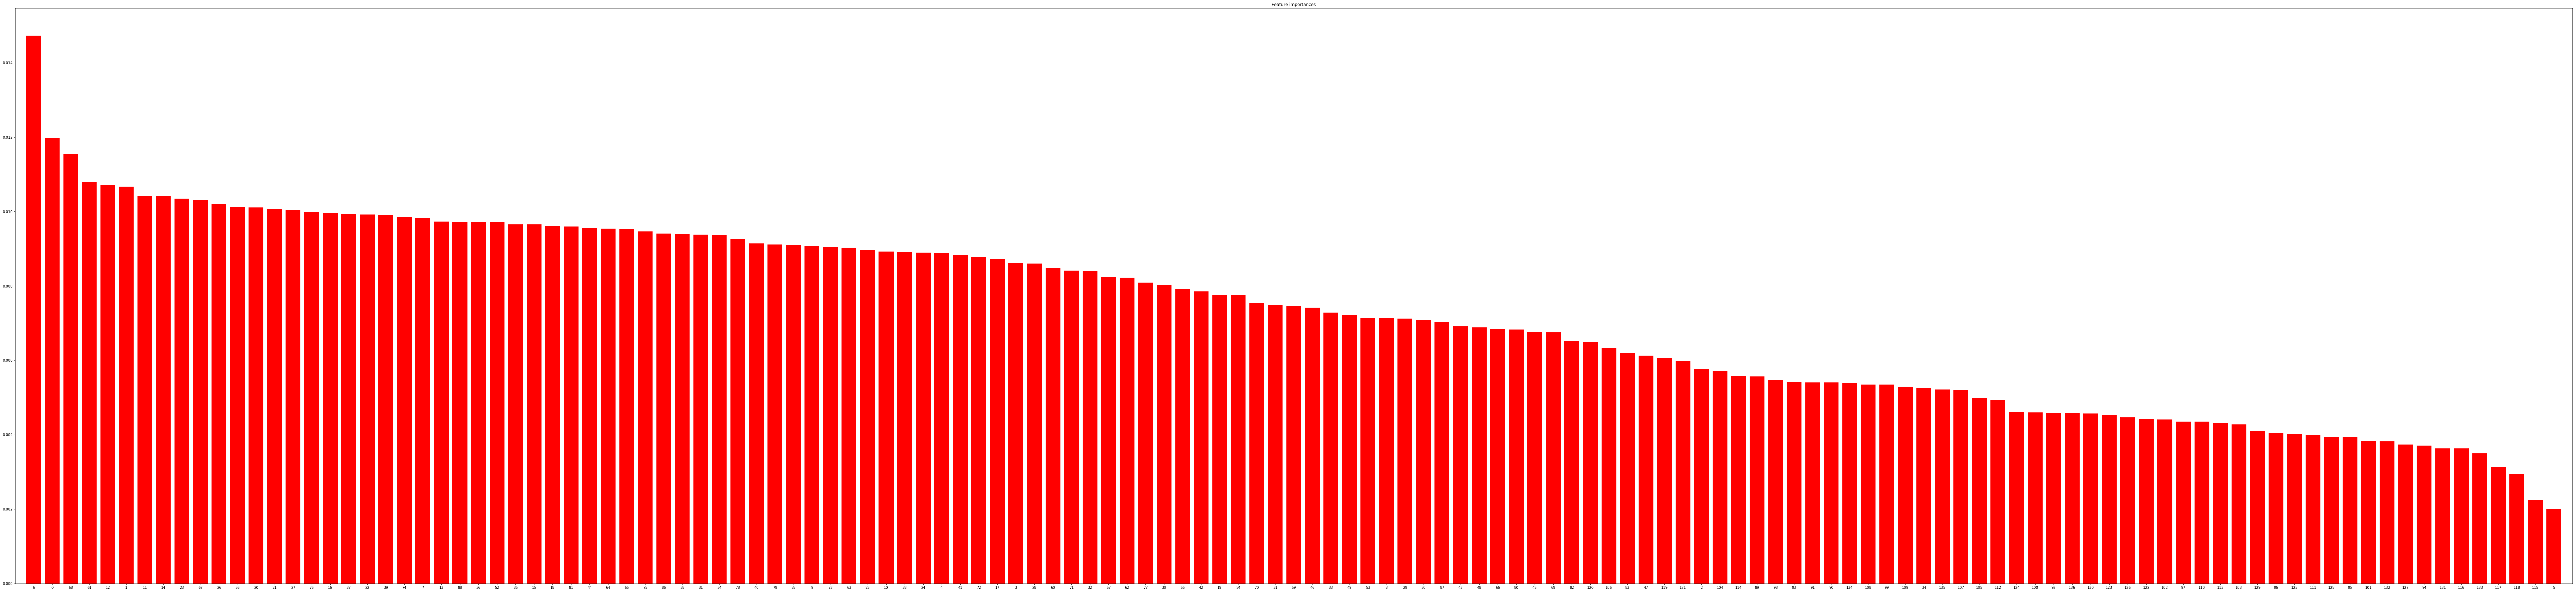

0.55689342343222314

In [37]:
model = XGBClassifier(n_estimators=1200,
                               nthread=8,
                               max_depth=15,
                                learning_rate=0.01,
                                colsample_bytree=0.5,
                               seed=4242)
model.fit(XX, y)
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(XX.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure(figsize=(130,30))
plt.title("Feature importances")
plt.bar(range(XX.shape[1]), importances[indices],
       color="r", align="center")
plt.xticks(range(XX.shape[1]), indices)
plt.xlim([-1, XX.shape[1]])
plt.show()



cross_val_score(model, XX, y, scoring='accuracy', cv=3).mean()

In [ ]:
# by 12: 0.55746098132016775

In [38]:
XX.columns

Index([        3,         4,         5,         8,         9,        10,
              11,        14,        15,        16,
       ...
        'min_13', 'mean_14',  'max_14',  'min_14', 'mean_15',  'max_15',
        'min_15', 'mean_16',  'max_16',  'min_16'],
      dtype='object', length=137)